# The objectives: (2 more supervised learning algorithms)

1. K-nearest neighors algorithm:
   - Definition and data problems.
   - Distance function.
   - Regression vs. classification.
   - The selection of K and overfitting/underfitting problem.
2. Naive Base Classifier:
   - Bayes theorm:prior,posterior, likelihood, and joint distribution.
   - Chain rule and approximate posterior.
   - Numeric example -- you should study this example doing its calculations by hand.
   - How to deal with missing values and new values in testing cases.



# [K-nearest neigbors algorithm][1]

K-nearest neighbors algorithm (k-NN) is <b> a non-parametric or instance-based or lazy </b> method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space.


<img style="float: center" src="./images/KnnClassification.png" alt="drawing" height="300" width="400"/>


## [KNN Algorithm][2]


1. Load the data and [prepare the data][5].
    - Rescale the data between 0,1.
    - Address missing data.
    - Lower dimensionality.
2. Initialize K to your chosen number of neighbors. K is a hyper-parameter.
3. For each example in the data
 - Calculate [the distance][3] between the query example and the current example from the data.
       - Remember L-norm 
 - Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries.
7. If [regression][4], return the mean of the K labels.
8. If classification, return the mode of the K labels.


[1]:https://blog.usejournal.com/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7
[2]:https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
[3]:https://towardsdatascience.com/importance-of-distance-metrics-in-machine-learning-modelling-e51395ffe60d
[4]:https://www.saedsayad.com/k_nearest_neighbors_reg.htm
[5]:https://machinelearningmastery.com/k-nearest-neighbors-for-machine-learning/

### How to choose K in KNN algorithm (Naive steps)

The selection of K leads to underfitting or overfitting.  Try the follwing:

1. if the class is binary, then select K to be odd to avoid ties.
2. if multi-class, then a rule of thumb is $K=\sqrt n$ where $n$ is the size of data points.
3. However, the ideal one is to use training and testing datasets as the below example.

### What is the best K and what is the next step?

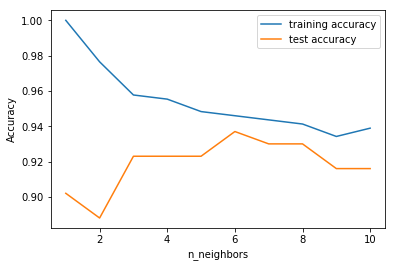

In [5]:
#The Book 2:

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# [Naive Bayes (NB) algorithm][1]

Naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features:
<br/>
<br/>
A vector $x=(x_{1},\cdots,x_{n})$ representing some n features (independent variables), it assigns to this instance probabilities    $p(C_{k}|x_{1},\cdots,x_{n})$ for each of $K$ possible outcomes or classes $C_{k}$.

If have very large number of variables, the problem is infeasible. Using Bayes' theorem, the conditional probability can be decomposed as:
<br/>
<br/>
<center>$\large p(C_{k}|x)=\frac{p(C_{k})p(x|C_{k})}{p(x)}$   </center> or <b> posterior= (prior x likelihood)/evidence </b>

The numerator is equivalent to the joint probability model: $p(C_{k}, x_{1},\cdots,x_{n})$

### [How to calculate joint probability: using chain rule][1]


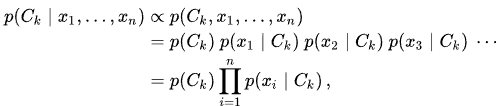




[1]:https://en.wikipedia.org/wiki/Naive_Bayes_classifier

# [Naive Bayes algorithm:Numeric Examples][1]


## The data:

<img style="float: center" src="./images/NB_weather_data.png" alt="drawing" height="400" width="500"/>


## The test example:

<img style="float: center" src="./images/question.png" alt="drawing" height="400" width="500"/>

## The question that we need to answer:

We need to calculate max(p(Yes|sunny, cool, high, true),p(No|sunny, cool, high, true)) to determine if play = yes or no.


## Solution steps:

### Step 1 :Calculate the frequency table and probabilities:

<img style="float: center" src="./images/freqTable.png" alt="drawing" height="500" width="600"/>

### Step 2: Calculate the joint probablities to estimate  postoriors for each class label Yes/No:


1. p(Yes|sunny, cool, high, true) = $p($Yes$)\prod_{i}^np(x_{i}|$Yes$)$ where $x_{i}\in ${sunny, cool, high, true}
    - p(Yes|sunny, cool, high, true)=$\frac{9}{14}\cdot(\frac{2}{9}\cdot\frac{3}{9}\cdot\frac{3}{9}\cdot\frac{3}{9})$=0.0053. <br/><br/>
2. p(No|sunny, cool, high, true) = $p($No$)\prod_{i}^np(x_{i}|$No$)$ where $x_{i}\in ${sunny, cool, high, true}
    - p(No|sunny, cool, high, true)=$\frac{5}{14}\cdot(\frac{3}{5}\cdot\frac{1}{5}\cdot\frac{4}{5}\cdot\frac{3}{5})$=0.0206


### Step 2: Find the maximum of postoriors for classes Yes/No:
- max(p(Yes|sunny, cool, high, true),p(No|sunny, cool, high, true))=0.0206. So, the the new instance will be classified as <b>No</b>.



[Another example][2]

[1]:http://www2.cs.uh.edu/~arjun/courses/nlp/naive_bayes_keller.pdf
[2]:http://www.inf.ed.ac.uk/teaching/courses/inf2b/learnSlides/inf2b12-learnlec06.pdf

## Question:

What we will do if we have a missing value or new value in testing instance case for NB classifier?
